In [289]:
import pandas as pd
import yaml

from java_migration.utils import REPO_ROOT

DATA_PATH = REPO_ROOT / "data" / "cov_expand_mini"

In [290]:
repo_dirs = [x for x in DATA_PATH.iterdir() if x.is_dir()]

before_paths = [x / "cov_before.yaml" for x in repo_dirs]
after_paths = [x / "cov_after.yaml" for x in repo_dirs]

cov_before = [yaml.safe_load(open(x)) | {"repo": r.name} for r, x in zip(repo_dirs, before_paths) if x.exists()]
cov_after = [yaml.safe_load(open(x)) | {"repo": r.name} for r, x in zip(repo_dirs, after_paths) if x.exists()]

print("total repos ran")
print(len(repo_dirs))
print("initial coverage calculated")
print(len(cov_before))
print("randoop succeeded")
print(len(cov_after))

total repos ran
15
initial coverage calculated
10
randoop succeeded
8


<Axes: xlabel='repo'>

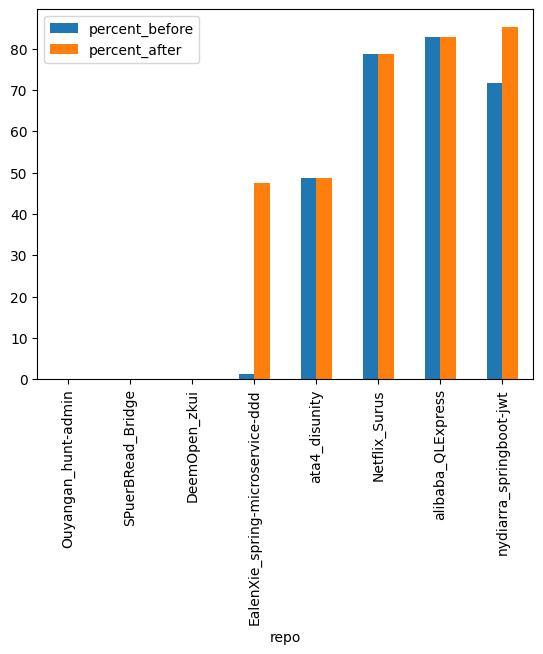

In [291]:
df_before = pd.DataFrame([x["LINE"] | {"repo": x["repo"]} for x in cov_before])
df_after = pd.DataFrame([x["LINE"] | {"repo": x["repo"]} for x in cov_after])

df_merged = df_before.merge(df_after, on="repo", suffixes=("_before", "_after")).set_index("repo")

df_merged[["percent_before", "percent_after"]].sort_values("percent_after").plot.bar()

In [292]:
len(df_merged)

8